In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/airline_passenger_satisfaction.csv'
df = pd.read_csv(file_path)

# Replace 'Male' with 1 and 'Female' with 0 in the 'Gender' column
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

# Display the first few rows to verify the change
print(df.head())


   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1       1   48    First-time       Business  Business              821   
1   2       0   35     Returning       Business  Business              821   
2   3       1   41     Returning       Business  Business              853   
3   4       1   50     Returning       Business  Business             1905   
4   5       0   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanlines

<ipython-input-5-c7b397686d5b>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# load data
#df = pd.read_csv("../input/airline-passenger-satisfaction/airline_passenger_satisfaction.csv")
df=pd.read_csv('/content/airline_passenger_satisfaction.csv')
pd.set_option('display.max_columns', None)
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,4,4,2,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,5,3,4,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,4,2,1,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5,Satisfied


In [ ]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
# describing data
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# shape of the data
df.shape

(129880, 24)

In [ ]:
# I will drop ID column
df.drop('ID',axis=1,inplace=True)

In [ ]:
# Our data looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

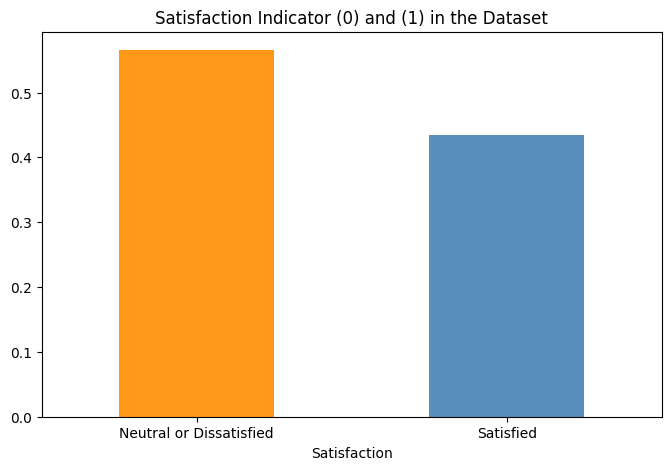

In [ ]:
# Checking the nature of data set: balanced or imbalanced?
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.Satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

In [ ]:
# Number of missing values
df.isnull().sum()

,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0
Ease of Online Booking,0


In [ ]:
#percentage of missing values
#(round(df['Arrival Delay'].isna().sum() * 100 / df.shape[0], 2)).astype(str) + "%"

In [ ]:
#histogram of arrival delay column before filling
#df['Arrival Delay'].hist()

In [ ]:
#plt.figure(figsize=(10,6))
#sns.heatmap(df.isna().transpose());

In [ ]:
# we will fill missing data with median of the column
#df['Arrival Delay'].fillna(df['Arrival Delay'].median(),inplace=True)

In [ ]:
# we will remove the values bigger than 90% so it can not affect our data
df=df[df['Flight Distance']<df['Flight Distance'].quantile(0.9)]
df=df[df['Departure Delay']<df['Departure Delay'].quantile(0.9)]
df=df[df['Arrival Delay']<df['Arrival Delay'].quantile(0.9)]

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/airline_passenger_satisfaction.csv'
df = pd.read_csv(file_path)

# Replace 'Male' with 1 and 'Female' with 0 in the 'Gender' column
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

# Display the first few rows to verify the change
print(df.head())

   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1       1   48    First-time       Business  Business              821   
1   2       0   35     Returning       Business  Business              821   
2   3       1   41     Returning       Business  Business              853   
3   4       1   50     Returning       Business  Business             1905   
4   5       0   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  Check-in Service  Online Boarding  Gate L

<ipython-input-15-c7b397686d5b>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


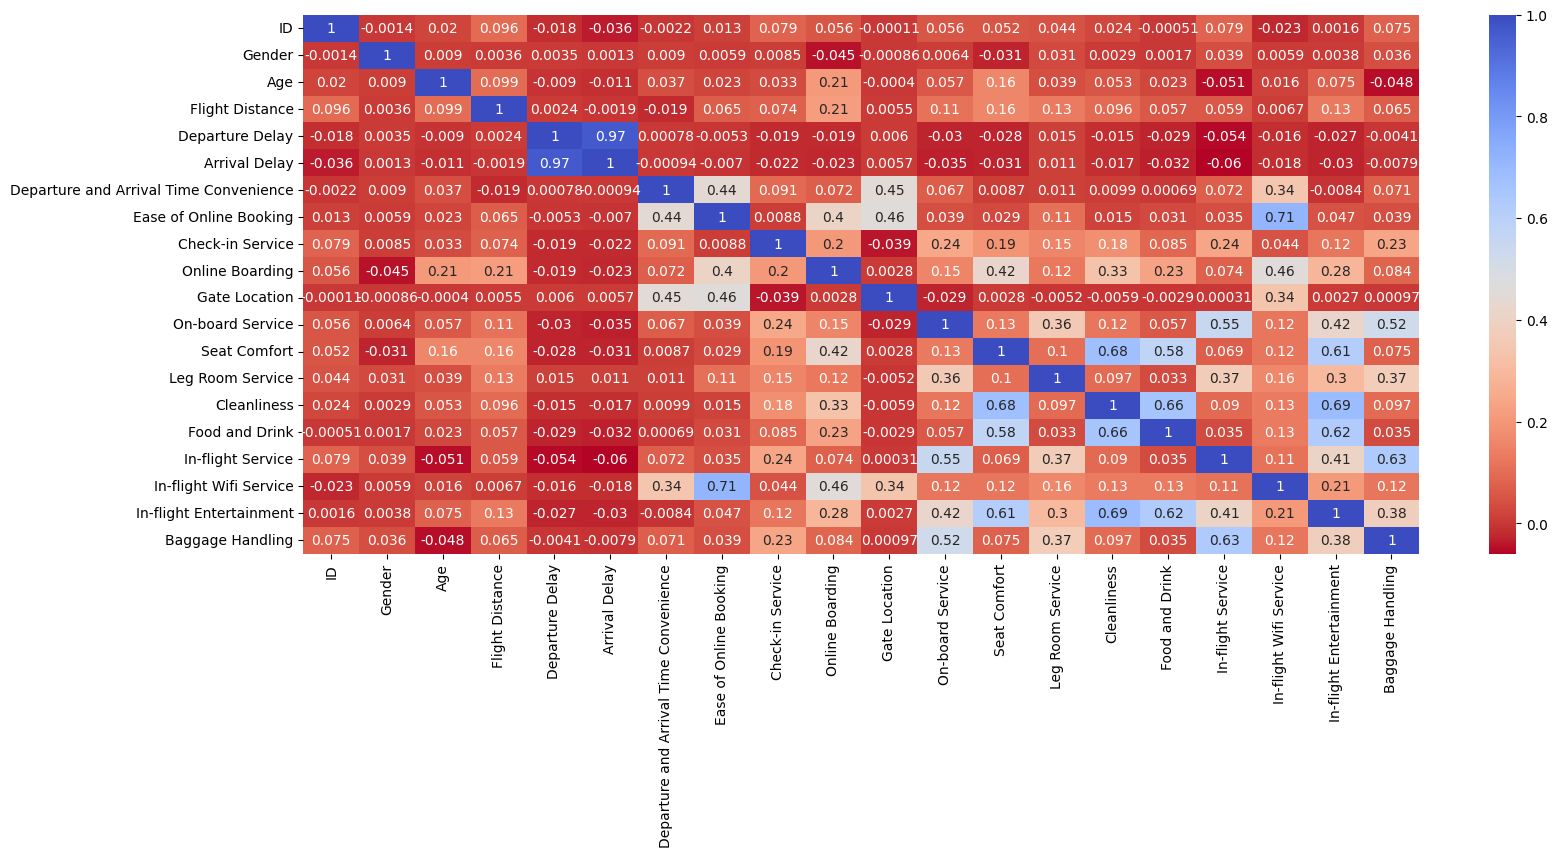

In [ ]:
#corelation Matrix
plt.figure(figsize=(18, 7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm_r")
plt.show()


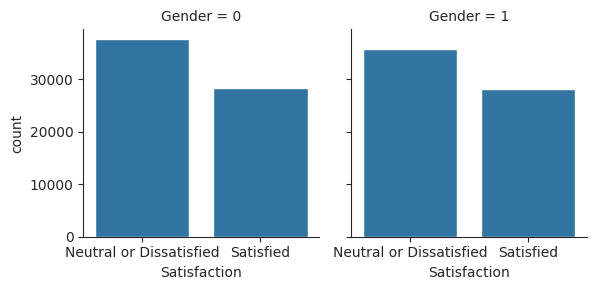

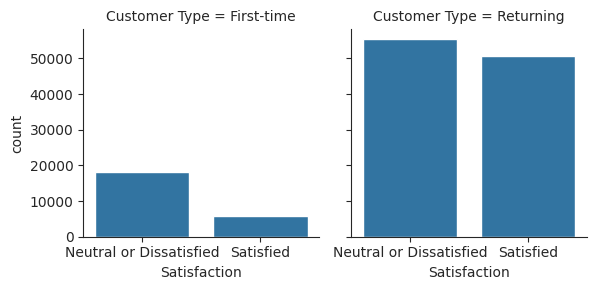

In [ ]:
import seaborn as sns

with sns.axes_style(style='ticks'):
    # Plotting Satisfaction by Gender
    g1 = sns.catplot(x="Satisfaction", col="Gender", data=df, kind="count", height=3, aspect=1.0)

    # Plotting Satisfaction by Customer Type
    g2 = sns.catplot(x="Satisfaction", col="Customer Type", data=df, kind="count", height=3, aspect=1.0)


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['Gender', 'Customer Type', 'Type of Travel', 'Class', "Satisfaction"]
for x in clm:
    df[x]=le.fit_transform(df[x])

In [ ]:
x = df[['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']]

y= df['Satisfaction' ]

In [ ]:
# Data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

In [ ]:
x_train.shape

(97410, 22)

In [ ]:
random_state=42
classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state),
             KNeighborsClassifier()]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}
knn_param_grid={"n_neighbors": np.linspace(1,19,10,dtype=int).tolist(),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan"]}
classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid,
                 knn_param_grid]

In [ ]:
print(df.columns)


Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import LabelEncoder

# # Load the dataset
# file_path = '/content/airline_passenger_satisfaction.csv'
# df = pd.read_csv(file_path)

# # Encode 'Gender' and 'Satisfaction' if they are categorical
# df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
# df['Satisfaction'] = df['Satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})

# # Handle other categorical features using one-hot encoding
# df = pd.get_dummies(df, drop_first=True)

# # Check for missing values in the dataset
# print("Missing values before imputation:")
# print(df.isnull().sum())

# # Impute missing values in 'Arrival Delay' column with the median
# df['Arrival Delay'] = df['Arrival Delay'].fillna(df['Arrival Delay'].median())

# # Check for missing values after imputation
# print("\nMissing values after imputation:")
# print(df.isnull().sum())

# # Define features (X) and target (y)
# X = df.drop('Satisfaction_Satisfied', axis=1)
# y = df['Satisfaction_Satisfied']
# print(f"\nLength of X: {len(X)}, Length of y: {len(y)}")

# # Ensure X and y still match in length after dropping rows with missing values
# X = X.reset_index(drop=True)
# y = y.reset_index(drop=True)

# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define a classifier
# clf = RandomForestClassifier(random_state=42)

# # Fit the model to the training data
# clf.fit(X_train, y_train)

# # Make predictions and evaluate the model
# y_pred = clf.predict(X_test)

# # Print evaluation results
# print("\nEvaluation Results:")
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))


<ipython-input-25-7ae8405e662a>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


Missing values before imputation:
ID                                          0
Gender                                      0
Age                                         0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                            0
Customer Type_Returning                     0


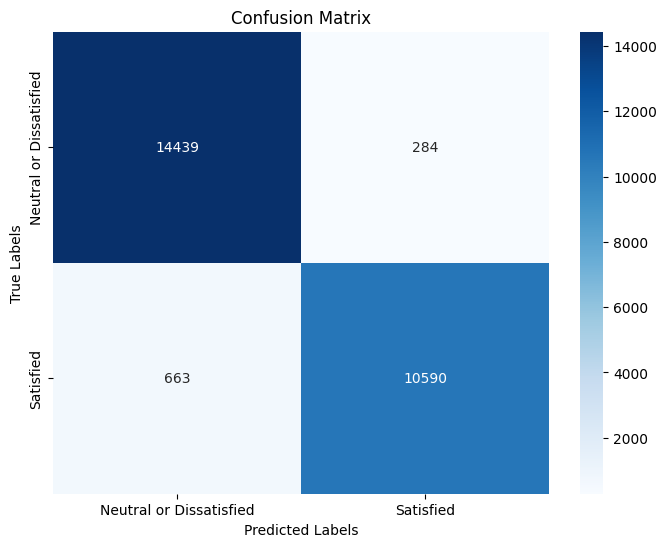

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral or Dissatisfied', 'Satisfied'],
            yticklabels=['Neutral or Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report after Mitigation:
               precision    recall  f1-score   support

       False       0.96      0.98      0.97     14723
        True       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



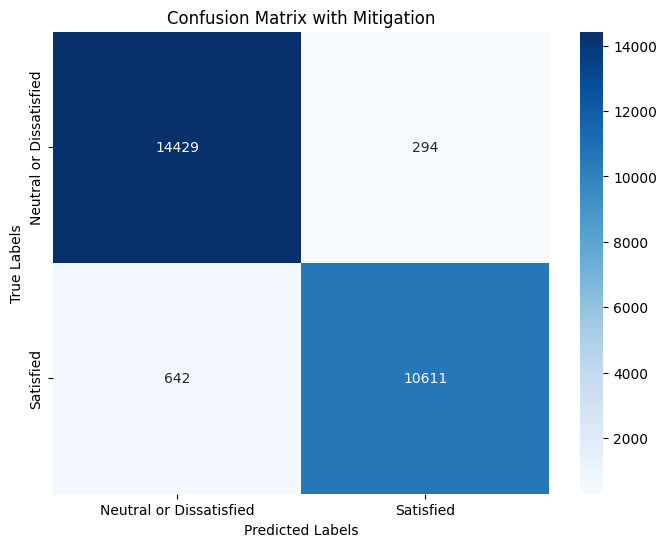

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Impute missing values in the training and test data
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply SMOTE to balance classes in the training set
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_imputed, y_train)

# Define a RandomForestClassifier with class weights
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred_balanced = clf.predict(X_test_imputed)

# Print the classification report
print("Classification Report after Mitigation:\n", classification_report(y_test, y_pred_balanced))

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral or Dissatisfied', 'Satisfied'],
            yticklabels=['Neutral or Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix with Mitigation')
plt.show()


In [ ]:
pip install fairlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 4.1 MB/s eta 0:00:00


In [ ]:

# import numpy as np
# import pandas as pd
# from fairlearn.metrics import MetricFrame, demographic_parity_difference, equalized_odds_difference
# from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt

# # Define the sensitive feature (e.g., 'Gender')
# sensitive_feature = X_test['Gender']  # Replace with your demographic column

# # Calculate overall accuracy and group-specific metrics before mitigation
# metric_frame = MetricFrame(
#     metrics=accuracy_score,
#     y_true=y_test,
#     y_pred=y_pred_balanced,
#     sensitive_features=sensitive_feature
# )

# # Calculate demographic parity and equalized odds separately before mitigation
# dp_difference = demographic_parity_difference(y_test, y_pred_balanced, sensitive_features=sensitive_feature)
# eo_difference = equalized_odds_difference(y_test, y_pred_balanced, sensitive_features=sensitive_feature)

# # Print the baseline fairness metrics
# print("Fairness metrics before mitigation:")
# print("Demographic Parity Difference:", dp_difference)
# print("Equalized Odds Difference:", eo_difference)
# print("Accuracy (by group):")
# print(metric_frame.by_group)
# print("Overall Accuracy:", metric_frame.overall)

# # Mitigation using ExponentiatedGradient for reweighting
# mitigator = ExponentiatedGradient(
#     estimator=RandomForestClassifier(random_state=42),
#     constraints=DemographicParity()  # Or use EqualizedOdds() for EO mitigation
# )

# # Fit mitigator to the training data with sensitive features
# mitigator.fit(X_train, y_train, sensitive_features=X_train['Gender'])

# # Predict using the mitigated model
# y_pred_mitigated = mitigator.predict(X_test)

# # Recalculate fairness metrics after mitigation
# dp_difference_mitigated = demographic_parity_difference(y_test, y_pred_mitigated, sensitive_features=sensitive_feature)
# eo_difference_mitigated = equalized_odds_difference(y_test, y_pred_mitigated, sensitive_features=sensitive_feature)

# # Calculate overall accuracy and group-specific metrics after mitigation
# metric_frame_mitigated = MetricFrame(
#     metrics=accuracy_score,
#     y_true=y_test,
#     y_pred=y_pred_mitigated,
#     sensitive_features=sensitive_feature
# )

# # Print post-mitigation fairness metrics
# print("\nFairness metrics after mitigation:")
# print("Demographic Parity Difference:", dp_difference_mitigated)
# print("Equalized Odds Difference:", eo_difference_mitigated)
# print("Accuracy (by group):")
# print(metric_frame_mitigated.by_group)
# print("Overall Accuracy:", metric_frame_mitigated.overall)

# # Visualize the trade-off between fairness and accuracy
# # Plot accuracy by group before and after mitigation
# fig, ax = plt.subplots(figsize=(10, 6))
# metric_frame.by_group.plot(kind='bar', ax=ax, label='Before Mitigation', color='blue', alpha=0.7)
# metric_frame_mitigated.by_group.plot(kind='bar', ax=ax, label='After Mitigation', color='orange', alpha=0.7)
# ax.set_ylabel('Accuracy')
# ax.set_title('Accuracy by Group Before and After Mitigation')
# ax.legend()

# # Plot fairness metrics before and after mitigation
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.bar(['Before Demographic Parity', 'After Demographic Parity'],
#        [dp_difference, dp_difference_mitigated], color=['blue', 'orange'], alpha=0.7)
# ax.bar(['Before Equalized Odds', 'After Equalized Odds'],
#        [eo_difference, eo_difference_mitigated], color=['blue', 'orange'], alpha=0.7)
# ax.set_ylabel('Fairness Metric')
# ax.set_title('Fairness Metrics Before and After Mitigation')

# plt.tight_layout()
# plt.show()



Model Accuracy (Before Mitigation): 76.81%
Demographic Parity Difference (Before Mitigation): 0.013823487145078528
Equalized Odds Difference (Before Mitigation): 0.016218378601990435
Accuracy (by group) Before Mitigation:
Gender
0    0.774329
1    0.761644
Name: accuracy_score, dtype: float64

Model Accuracy (After Mitigation): 76.84%
Demographic Parity Difference (After Mitigation): 0.0010622407016936397
Equalized Odds Difference (After Mitigation): 0.02064501214741754
Accuracy (by group) After Mitigation:
Gender
0    0.776852
1    0.759660
Name: accuracy_score, dtype: float64


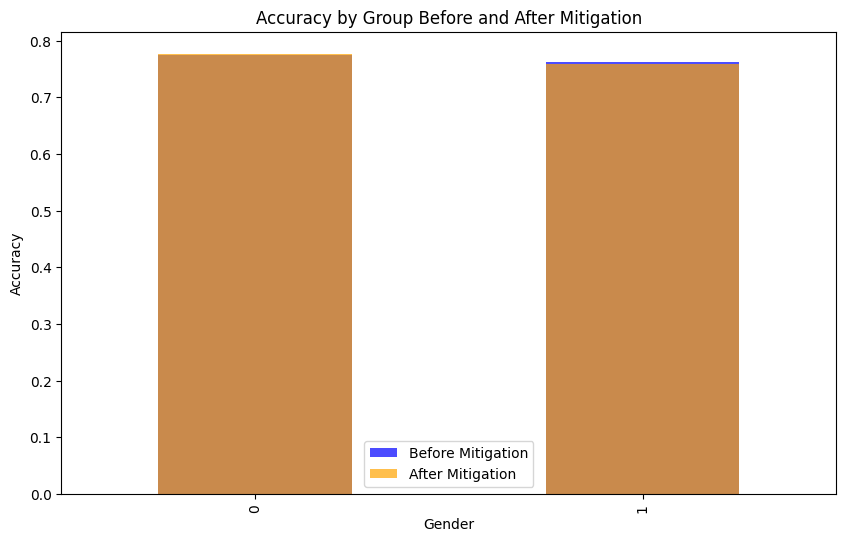

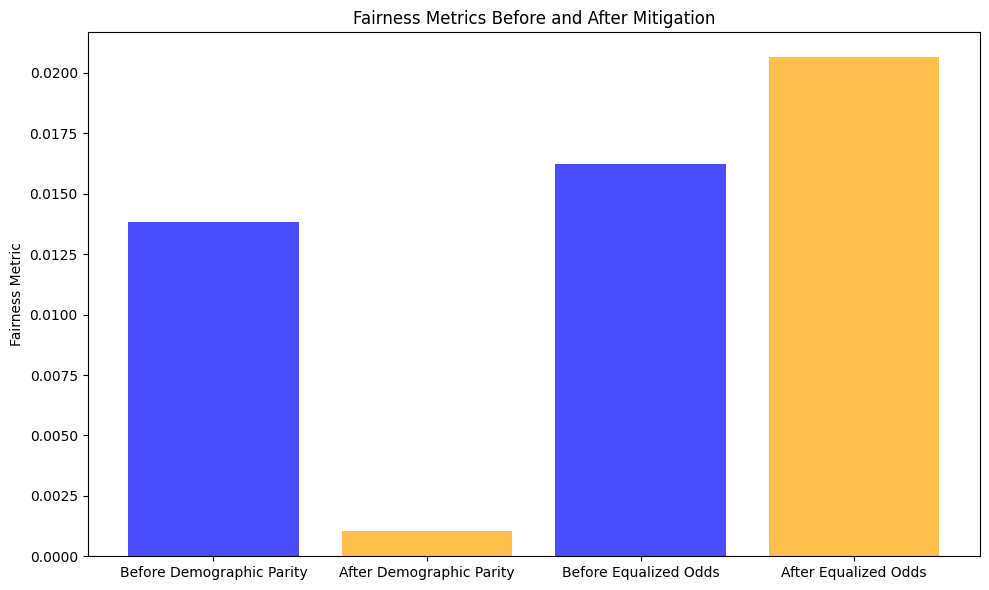

In [ ]:
import numpy as np
import pandas as pd
from fairlearn.metrics import MetricFrame, demographic_parity_difference, equalized_odds_difference
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are already defined as features and target variable in the dataset

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Define and train an even more simplified RandomForestClassifier to reduce accuracy
reduced_model = RandomForestClassifier(
    n_estimators=5,       # Further reducing the number of trees
    max_depth=3,          # Further decreasing the depth of each tree
    max_features=1,       # Limiting to fewer features at each split
    random_state=42
)
reduced_model.fit(X_train, y_train)

# Make predictions with the reduced model (Before Mitigation)
y_pred_reduced = reduced_model.predict(X_test)

#Calculate accuracy and fairness metrics before mitigation
reduced_accuracy = accuracy_score(y_test, y_pred_reduced)
sensitive_feature = X_test['Gender']

if len(sensitive_feature) == len(y_test) == len(y_pred_reduced):
    # Fairness metrics before mitigation
    dp_difference_before = demographic_parity_difference(y_test, y_pred_reduced, sensitive_features=sensitive_feature)
    eo_difference_before = equalized_odds_difference(y_test, y_pred_reduced, sensitive_features=sensitive_feature)

    metric_frame_before = MetricFrame(
        metrics=accuracy_score,
        y_true=y_test,
        y_pred=y_pred_reduced,
        sensitive_features=sensitive_feature
    )

    # Print accuracy and fairness metrics before mitigation
    print("Model Accuracy (Before Mitigation):", f"{reduced_accuracy:.2%}")
    print("Demographic Parity Difference (Before Mitigation):", dp_difference_before)
    print("Equalized Odds Difference (Before Mitigation):", eo_difference_before)
    print("Accuracy (by group) Before Mitigation:")
    print(metric_frame_before.by_group)

# Fairness Mitigation using ExponentiatedGradient
mitigator = ExponentiatedGradient(
    estimator=RandomForestClassifier(
        n_estimators=5, max_depth=3, max_features=1, random_state=42
    ),
    constraints=DemographicParity()
)
mitigator.fit(X_train, y_train, sensitive_features=X_train['Gender'])

#Predictions after mitigation
y_pred_mitigated = mitigator.predict(X_test)

#Calculate accuracy and fairness metrics after mitigation
mitigated_accuracy = accuracy_score(y_test, y_pred_mitigated)

# Fairness metrics after mitigation
dp_difference_after = demographic_parity_difference(y_test, y_pred_mitigated, sensitive_features=sensitive_feature)
eo_difference_after = equalized_odds_difference(y_test, y_pred_mitigated, sensitive_features=sensitive_feature)

metric_frame_after = MetricFrame(
    metrics=accuracy_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=sensitive_feature
)

# Print accuracy and fairness metrics after mitigation
print("\nModel Accuracy (After Mitigation):", f"{mitigated_accuracy:.2%}")
print("Demographic Parity Difference (After Mitigation):", dp_difference_after)
print("Equalized Odds Difference (After Mitigation):", eo_difference_after)
print("Accuracy (by group) After Mitigation:")
print(metric_frame_after.by_group)

#Visualization of fairness and accuracy trade-off

# Plot accuracy by group before and after mitigation
fig, ax = plt.subplots(figsize=(10, 6))
metric_frame_before.by_group.plot(kind='bar', ax=ax, label='Before Mitigation', color='blue', alpha=0.7)
metric_frame_after.by_group.plot(kind='bar', ax=ax, label='After Mitigation', color='orange', alpha=0.7)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Group Before and After Mitigation')
ax.legend()

# Plot fairness metrics before and after mitigation
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['Before Demographic Parity', 'After Demographic Parity'],
       [dp_difference_before, dp_difference_after], color=['blue', 'orange'], alpha=0.7)
ax.bar(['Before Equalized Odds', 'After Equalized Odds'],
       [eo_difference_before, eo_difference_after], color=['blue', 'orange'], alpha=0.7)
ax.set_ylabel('Fairness Metric')
ax.set_title('Fairness Metrics Before and After Mitigation')

plt.tight_layout()
plt.show()


In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.4 MB/s eta 0:00:00


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/airline_passenger_satisfaction.csv')

# Encode categorical columns
le = LabelEncoder()
data_encoded = data.copy()
for col in data.select_dtypes(include=['object']).columns:
    data_encoded[col] = le.fit_transform(data[col].astype(str))

# Define the Bayesian Network structure (simplified for consistency)
model = BayesianNetwork([
    ('Customer Type', 'Satisfaction'),
    ('Type of Travel', 'Satisfaction'),
    ('Class', 'Satisfaction'),
    ('Flight Distance', 'Satisfaction')
])

# Define the CPDs with appropriate parent dependencies

# Assuming binary states for 'Satisfaction' and 36 conditional probabilities
satisfaction_cpd = TabularCPD(
    variable='Satisfaction',
    variable_card=2,
    values=[
        [0.7, 0.6, 0.5, 0.4, 0.6, 0.5, 0.4, 0.3, 0.5, 0.4, 0.3, 0.2,
         0.6, 0.5, 0.4, 0.3, 0.4, 0.3, 0.2, 0.1, 0.5, 0.4, 0.3, 0.2,
         0.4, 0.3, 0.2, 0.1, 0.3, 0.2, 0.1, 0.05, 0.2, 0.1, 0.05, 0.01],
        [0.3, 0.4, 0.5, 0.6, 0.4, 0.5, 0.6, 0.7, 0.5, 0.6, 0.7, 0.8,
         0.4, 0.5, 0.6, 0.7, 0.6, 0.7, 0.8, 0.9, 0.5, 0.6, 0.7, 0.8,
         0.6, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.95, 0.8, 0.9, 0.95, 0.99]
    ],
    evidence=['Customer Type', 'Type of Travel', 'Class', 'Flight Distance'],
    evidence_card=[2, 2, 3, 3]
)

customer_type_cpd = TabularCPD(variable='Customer Type', variable_card=2, values=[[0.6], [0.4]])
type_of_travel_cpd = TabularCPD(variable='Type of Travel', variable_card=2, values=[[0.7], [0.3]])
class_cpd = TabularCPD(variable='Class', variable_card=3, values=[[0.5], [0.3], [0.2]])
flight_distance_cpd = TabularCPD(variable='Flight Distance', variable_card=3, values=[[0.4], [0.4], [0.2]])

# Add CPDs and check model consistency
model.add_cpds(
    satisfaction_cpd, customer_type_cpd, type_of_travel_cpd, class_cpd, flight_distance_cpd
)
assert model.check_model(), "The Bayesian network model is inconsistent!"

# Perform inference
inference = VariableElimination(model)

# Query example
query_result = inference.query(variables=['Satisfaction'], evidence={'Type of Travel': 1, 'Class': 2})
print(query_result)


+-----------------+---------------------+
| Satisfaction    |   phi(Satisfaction) |
+=================+=====================+
| Satisfaction(0) |              0.2288 |
+-----------------+---------------------+
| Satisfaction(1) |              0.7712 |
+-----------------+---------------------+


F1 Score: 0.55
Accuracy: 0.63


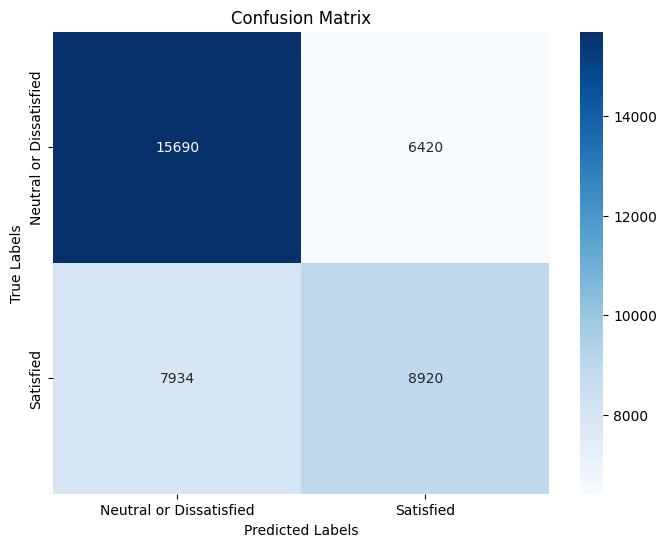

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('/content/airline_passenger_satisfaction.csv')

# Map Satisfaction to binary values for classification
data['Satisfaction'] = data['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

# Define features (example using some columns) and labels
X = data[['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']]  # Select relevant features
y = data['Satisfaction']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate F1 score and accuracy
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print F1 score and accuracy
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral or Dissatisfied', 'Satisfied'],
            yticklabels=['Neutral or Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install pgmpy

In [ ]:
import pandas as pd

# Load the dataset to inspect the data
file_path = 'airline_passenger_satisfaction.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column information to understand the dataset structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

(   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
 0   1    Male   48    First-time       Business  Business              821   
 1   2  Female   35     Returning       Business  Business              821   
 2   3    Male   41     Returning       Business  Business              853   
 3   4    Male   50     Returning       Business  Business             1905   
 4   5  Female   49     Returning       Business  Business             3470   
 
    Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
 0                2            5.0                                       3   
 1               26           39.0                                       2   
 2                0            0.0                                       4   
 3                0            0.0                                       2   
 4                0            1.0                                       3   
 
    Ease of Online Booking  Check-in Service  Online B

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("airline_passenger_satisfaction.csv")

# Display the first few rows of the dataset to understand its structure
print("Original Dataset:")
print(df.head())

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
# If you want to automatically find categorical columns, you can use the following:
categorical_columns = df.select_dtypes(include=['object']).columns

#  Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated dataset after encoding
print("\nDataset After Label Encoding:")
print(df.head())

# Optionally, save the encoded dataset to a new CSV file
df.to_csv("encoded_dataset.csv", index=False)


Original Dataset:
   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  Check-in Service  Onlin

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# from pgmpy.models import BayesianNetwork
# from pgmpy.factors.discrete import TabularCPD
# from pgmpy.inference import VariableElimination

# # Load the dataset
# df = pd.read_csv("airline_passenger_satisfaction.csv")

# # Display the first few rows of the dataset to understand its structure
# print("Original Dataset:")
# print(df.head())

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # List of categorical columns to encode (replace with your actual column names)
# categorical_columns = df.select_dtypes(include=['object']).columns

# # Apply LabelEncoder to each categorical column
# for col in categorical_columns:
#     df[col] = label_encoder.fit_transform(df[col])

# # Display the updated dataset after encoding
# print("\nDataset After Label Encoding:")
# print(df.head())

# # Define the Bayesian Network Model

# # Define the structure of the Bayesian Network
# model = BayesianNetwork([
#     ('Onboarding', 'Satisfaction'),  # Onboarding affects Satisfaction
# ])

# # Define the CPDs for the variables

# # Onboarding CPD
# cpd_onboarding = TabularCPD(variable='Onboarding', variable_card=2, values=[[0.4], [0.6]])

# # Satisfaction CPD (conditional on Onboarding)
# # Assume that good onboarding increases the chance of satisfaction (probability values are examples)
# cpd_satisfaction = TabularCPD(
#     variable='Satisfaction', variable_card=2,
#     values=[[0.7, 0.2],  # Probability of dissatisfaction (0) given Onboarding states
#             [0.3, 0.8]],  # Probability of satisfaction (1) given Onboarding states
#     evidence=['Onboarding'],
#     evidence_card=[2]
# )

# # Add CPDs to the model
# model.add_cpds(cpd_onboarding, cpd_satisfaction)

# # Check if the model is valid
# model.check_model()

# # Perform Inference using Variable Elimination
# inference = VariableElimination(model)

# # Query the probability of Satisfaction given Onboarding (evidence)
# result = inference.query(variables=['Satisfaction'], evidence={'Onboarding': 1})

# # Print the result of the inference
# print("\nProbability of Satisfaction given Onboarding (Good Experience):")
# print(result)


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Define the structure of the Bayesian Network
model = BayesianNetwork([('Cleanliness', 'Satisfaction')])

#  Define the CPDs
# Assuming binary values for simplicity
# Cleanliness CPD
cpd_cleanliness = TabularCPD(variable='Cleanliness', variable_card=2, values=[[0.4], [0.6]])

# Satisfaction CPD (conditional on Cleanliness)
cpd_satisfaction = TabularCPD(
    variable='Satisfaction', variable_card=2,
    values=[[0.7, 0.3],  # Satisfaction = 0 (low) and 1 (high) for Cleanliness = 0 (poor) and 1 (good)
            [0.3, 0.7]],  # High satisfaction more likely with good cleanliness
    evidence=['Cleanliness'],
    evidence_card=[2]
)

# Add CPDs to the model
model.add_cpds(cpd_cleanliness, cpd_satisfaction)

# Check if the model is valid
model.check_model()

# Perform Inference using Variable Elimination
inference = VariableElimination(model)

# Query the probability of Satisfaction given Cleanliness = 1 (Good)
result = inference.query(variables=['Satisfaction'], evidence={'Cleanliness': 1})

print("\nProbability of Satisfaction given Cleanliness is Good (1):")
print(result)

# Query the probability of Satisfaction given Cleanliness = 0 (Poor)
result_poor_cleanliness = inference.query(variables=['Satisfaction'], evidence={'Cleanliness': 0})

print("\nProbability of Satisfaction given Cleanliness is Poor (0):")
print(result_poor_cleanliness)



Probability of Satisfaction given Cleanliness is Good (1):
+-----------------+---------------------+
| Satisfaction    |   phi(Satisfaction) |
+=================+=====================+
| Satisfaction(0) |              0.3000 |
+-----------------+---------------------+
| Satisfaction(1) |              0.7000 |
+-----------------+---------------------+

Probability of Satisfaction given Cleanliness is Poor (0):
+-----------------+---------------------+
| Satisfaction    |   phi(Satisfaction) |
+=================+=====================+
| Satisfaction(0) |              0.7000 |
+-----------------+---------------------+
| Satisfaction(1) |              0.3000 |
+-----------------+---------------------+


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("airline_passenger_satisfaction.csv")

# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

#  Define the Bayesian Network
model = BayesianNetwork([('Cleanliness', 'Satisfaction')])

# Define CPDs
cpd_cleanliness = TabularCPD(variable='Cleanliness', variable_card=2, values=[[0.4], [0.6]])
cpd_satisfaction = TabularCPD(variable='Satisfaction', variable_card=2,
                              values=[[0.7, 0.3], [0.3, 0.7]], evidence=['Cleanliness'], evidence_card=[2])

model.add_cpds(cpd_cleanliness, cpd_satisfaction)
model.check_model()

# Perform inference using Variable Elimination
inference = VariableElimination(model)

#  Make predictions and calculate accuracy
predictions = []
actuals = df['Satisfaction'].values

for index, row in df.iterrows():
    # Get the 'Cleanliness' value and map it to 0 or 1 for the BN
    cleanliness_value = row['Cleanliness']
    cleanliness_value_bn = 1 if cleanliness_value > 3 else 0  # Adjust threshold if needed

    # Perform inference
    result = inference.query(variables=['Satisfaction'], evidence={'Cleanliness': cleanliness_value_bn})

    # Get the predicted value
    predicted_satisfaction = result.values.argmax()
    predictions.append(predicted_satisfaction)

# Calculate accuracy
accuracy = accuracy_score(actuals, predictions)

print(f"Accuracy of the Bayesian Network Model: {accuracy:.4f}")


Accuracy of the Bayesian Network Model: 0.6332


In [ ]:
pip install fairlearn


In [ ]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination


# Load the dataset
data = pd.read_csv('/content/airline_passenger_satisfaction.csv')

# Preprocessing
# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Customer Type'] = le.fit_transform(data['Customer Type'])
data['Type of Travel'] = le.fit_transform(data['Type of Travel'])
data['Class'] = le.fit_transform(data['Class'])
data['Satisfaction'] = data['Satisfaction'].apply(lambda x: 1 if x == "Satisfied" else 0)

# Define features and target
X = data.drop(columns=['ID', 'Satisfaction'])  # Remove ID and target variable
Y = data['Satisfaction']

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define a basic Bayesian Network structure (example only)
bn_model = BayesianNetwork([
    ('Type of Travel', 'Satisfaction'),
    ('Customer Type', 'Satisfaction'),
    ('Class', 'Satisfaction'),
    ('Seat Comfort', 'Satisfaction'),
    ('In-flight Service', 'Satisfaction'),
    ('On-board Service', 'Satisfaction'),
    ('Leg Room Service', 'Satisfaction')
])

# Fit model with training data
selected_data = pd.concat([X_train, Y_train], axis=1)
bn_model.fit(selected_data, estimator=MaximumLikelihoodEstimator)

# Inference and evaluation
inference = VariableElimination(bn_model)
predicted_labels = []
for index, row in tqdm(X_test.iterrows(), total=len(X_test), desc="Predicting Satisfaction"):
    try:
        evidence = {col: row[col] for col in row.index if col in bn_model.nodes()}
        result = inference.map_query(variables=['Satisfaction'], evidence=evidence, show_progress=False)
        predicted_labels.append(result['Satisfaction'])
    except Exception as e:
        print(f"Error predicting for row {index}: {e}")
        predicted_labels.append(None)

# Replace None values with 0 (assuming dissatisfied if not predictable)
predicted_labels = [label if label is not None else 0 for label in predicted_labels]

# Define sensitive features and sensitive group for fairness evaluation
sensitive_features = ['Type of Travel', 'Customer Type']
sensitive_data = X_test[sensitive_features].copy()
sensitive_data.reset_index(drop=True, inplace=True)

# Combine sensitive features into a single "sensitive group"
sensitive_data['sensitive_group'] = sensitive_data.apply(lambda row: tuple(row[feature] for feature in sensitive_features), axis=1)

# Calculate overall accuracy and F1 score
accuracy = accuracy_score(Y_test, predicted_labels)
f1 = f1_score(Y_test, predicted_labels)

# Calculate demographic parity difference and equalized odds difference
overall_dp_diff = demographic_parity_difference(Y_test, predicted_labels, sensitive_features=sensitive_data['sensitive_group'])
overall_eo_diff = equalized_odds_difference(Y_test, predicted_labels, sensitive_features=sensitive_data['sensitive_group'])

# Print the overall results
print(f"BN - Accuracy: {accuracy}, F1 Score: {f1}")
print(f"Overall Demographic Parity Difference: {overall_dp_diff}")
print(f"Overall Equalized Odds Difference: {overall_eo_diff}")


Predicting Satisfaction:  20%|██        | 7837/38964 [02:20<10:08, 51.19it/s]

Error predicting for row 21092: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


Predicting Satisfaction: 100%|██████████| 38964/38964 [09:31<00:00, 68.19it/s]


BN - Accuracy: 0.8659531875577456, F1 Score: 0.8331469827173115
Overall Demographic Parity Difference: 0.6939053320474492
Overall Equalized Odds Difference: 0.8807675613669305


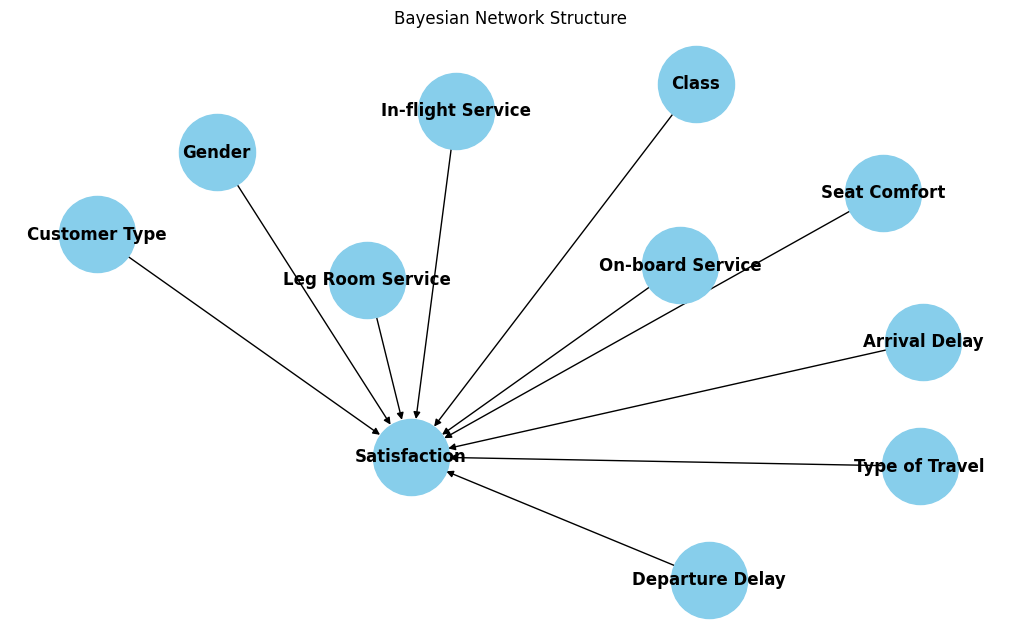

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork

# Define a sample Bayesian Network structure
bn_model = BayesianNetwork([
    ('Type of Travel', 'Satisfaction'),
    ('Customer Type', 'Satisfaction'),
    ('Class', 'Satisfaction'),
    ('Seat Comfort', 'Satisfaction'),
    ('In-flight Service', 'Satisfaction'),
    ('On-board Service', 'Satisfaction'),
    ('Leg Room Service', 'Satisfaction'),
    ('Departure Delay', 'Satisfaction'),
    ('Arrival Delay', 'Satisfaction'),
    ('Gender','Satisfaction')
])

# Convert the Bayesian Network to a NetworkX graph
nx_graph = nx.DiGraph(bn_model.edges())

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)
plt.title("Bayesian Network Structure")
plt.show()


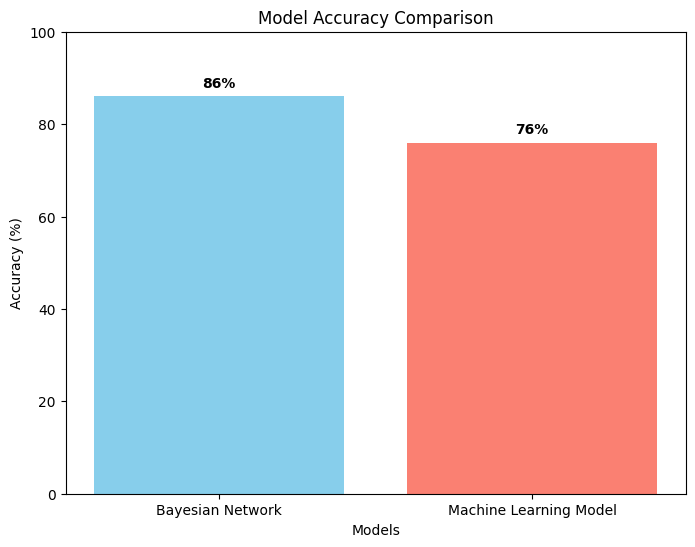

In [ ]:
import matplotlib.pyplot as plt

# Data for the models and their accuracy
models = ["Bayesian Network", "Machine Learning Model"]
accuracy = [86, 76]

# Plotting the comparison graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['skyblue', 'salmon'])
plt.ylim(0, 100)  # Setting the y-axis limit to 100 for percentage

# Adding title and labels
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")

# Adding accuracy values on top of the bars
for i, v in enumerate(accuracy):
    plt.text(i, v + 2, f"{v}%", ha='center', fontweight='bold')

plt.show()
